<span style="font-size:30px;">**Fetal Health Check**.</span>  

This project aims to compare three machine learning models developed in response to the rising instances of child and maternal mortality in hospitals. It focuses on assessing the fetal health of children and maternal well-being by examining factors such as fetal heart rate (FHR), fetal movements, and uterine contractions. Performance metrics such F1 score, precision and recall are considered.

<span style="font-size:20px;">**Decision Tree Model**.</span>

In [75]:
#Load necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [76]:
#Load dataset to see the data you're working with
filepath = 'FetalHealth.csv'
data = pd.read_csv(filepath)  
print(data.head())

   baseline_value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  prolongued_decelerations  abnormal_short_term  \
0                0.000                       0.0                   73   
1                0.003                       0.0                   17   
2                0.003                       0.0                   16   
3                0.003                       0.0                   16   
4                0.000                       0.0                   16   

   fetalhealth  
0            2  
1            1  
2            1  
3            1  
4            1  


In [77]:
#Preprocessing: extract independent-x and dependent-y variables        
y_data = data['fetalhealth']
X_data = data.drop('fetalhealth', axis = 1)
print(data.head())

   baseline_value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  prolongued_decelerations  abnormal_short_term  \
0                0.000                       0.0                   73   
1                0.003                       0.0                   17   
2                0.003                       0.0                   16   
3                0.003                       0.0                   16   
4                0.000                       0.0                   16   

   fetalhealth  
0            2  
1            1  
2            1  
3            1  
4            1  


In [78]:
#Get Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.30, random_state = 0)
print(X_train.shape, ': Training data size')
print(X_test.shape, ': Test data size') 

(1488, 7) : Training data size
(638, 7) : Test data size


__Training the Decision Tree Classifier:__ use entropy for criterion, which specifies that the criterion for splitting nodes is based on information entropy.

In [79]:
DTclass = DecisionTreeClassifier(criterion='entropy', random_state=0)     

#Train the decision tree classifier
DTclass.fit(X_train, y_train)    

#The predict method is used to make predictions on the test set
pred_y = DTclass.predict(X_test)

**Evaluating the trained model**

In [80]:
C_matrix = confusion_matrix(y_test, pred_y)

#printing the classification report and confusion matrix from the model
print(classification_report(y_test, pred_y))
print(C_matrix)
print("\nAccuracy:", round(accuracy_score(y_test, pred_y),3))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       494
           2       0.66      0.60      0.63        86
           3       0.75      0.81      0.78        58

    accuracy                           0.89       638
   macro avg       0.78      0.79      0.79       638
weighted avg       0.89      0.89      0.89       638

[[470  19   5]
 [ 23  52  11]
 [  3   8  47]]

Accuracy: 0.892


__Analyzing the classification report__

- Precision measures the accuracy of positive predictions. It's the ratio of correctly predicted positive observations to the total predicted positives.
- Recall measures the ability of the model to capture all the relevant instances of a class. It's the ratio of correctly predicted positive observations to the total actual positives.
- The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

So for the three instances/ classes the model predicts: It performs well for class 1, moderately for class 2, and quite well for class 3. Class imbalances are not severe, and overall accuracy is 89%. Further investigation may be needed, especially for class 2.

**visualizing the confusion matrix**

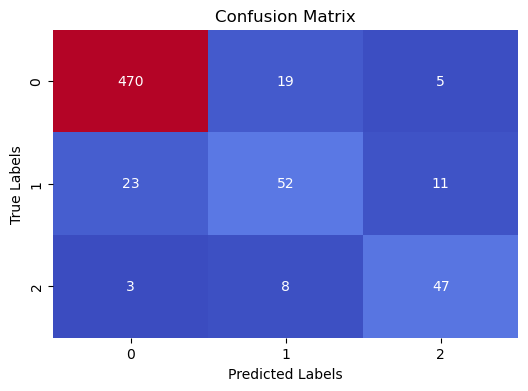

In [81]:
plt.figure(figsize=(6, 4))
sns.heatmap(C_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<span style="font-size:20px;">**Randon Forest Model**</span>

In [82]:
#import random forest library
from sklearn.ensemble import RandomForestClassifier

 <span style="font-size:16px;">Using the same dataset, we build a random forest model..</span>

In [83]:

RFclass = RandomForestClassifier(n_estimators=50, bootstrap=True, criterion='entropy', random_state=0) 

#Train the Random Forest classifier
RFclass.fit(X_train, y_train)    
pred_y = RFclass.predict(X_test)

**Evaluating the trained model**

In [84]:
Cmatrix = confusion_matrix(y_test, pred_y)
print('Confusion Matrix: \n\n', Cmatrix)
print('\n Classification Report: \n', classification_report(y_test, pred_y))
print("\nAccuracy: = ", round(accuracy_score(y_test, pred_y),3))

Confusion Matrix: 

 [[484  10   0]
 [ 24  55   7]
 [  4   9  45]]

 Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.98      0.96       494
           2       0.74      0.64      0.69        86
           3       0.87      0.78      0.82        58

    accuracy                           0.92       638
   macro avg       0.85      0.80      0.82       638
weighted avg       0.91      0.92      0.91       638


Accuracy: =  0.915


__Analyzing the classification report__

Class 1 shows high precision, recall, and F1-score, indicating accurate predictions. Class 2 exhibits moderate precision and recall, with room for improvement in prediction accuracy. Class 3 demonstrates good precision and recall, contributing to a balanced F1-score. 
Overall accuracy is 92%, and macro and weighted averages suggest a well-performing model across the evaluated metrics.

**visualizing the confusion matrix**

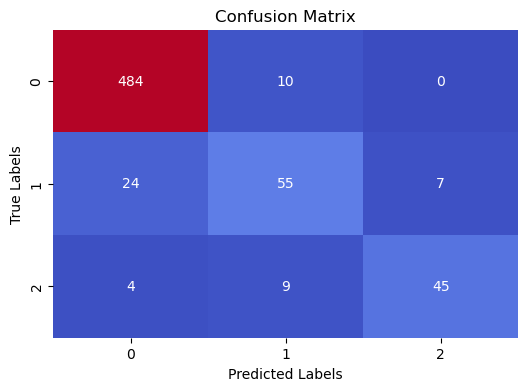

In [85]:
plt.figure(figsize=(6, 4))
sns.heatmap(Cmatrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<span style="font-size:24px;">**K-Nearest Neighbor Model**</span>

In [86]:
#import neccesary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [87]:
#use the StandardScaler function to standardize the feature values so they contribute equally to the distance computation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<span style='font-size:16px;'>**Train the KNN Model**</span>

In [88]:
#adjust the value of K to get the best results
k = 3
knn_model = KNeighborsClassifier(n_neighbors = k)

knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

<span style='font-size=16px;'>**Making predictions**</span>

In [89]:
y_pred = knn_model.predict(X_test_scaled)

<span style='font-size:16px;'>**Evaluating the trained Model**</span>

In [90]:
#confusion matrix
Conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", Conf_matrix)
print("\nAccuracy:", round(accuracy_score(y_test, y_pred),3))

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.95      0.95       494
           2       0.64      0.67      0.66        86
           3       0.91      0.71      0.80        58

    accuracy                           0.89       638
   macro avg       0.83      0.78      0.80       638
weighted avg       0.90      0.89      0.89       638

Confusion Matrix:
 [[471  21   2]
 [ 26  58   2]
 [  5  12  41]]

Accuracy: 0.893


**Analyzing the classification report**  
For Class 1, precision and recall are both high at 0.94 and 0.95, respectively, resulting in an overall F1-score of 0.95. Class 2 exhibits slightly lower precision and recall at 0.64 and 0.67, contributing to an F1-score of 0.66. Class 3 displays a high precision of 0.91 but a lower recall of 0.71, yielding an F1-score of 0.80. The overall accuracy of the model is 0.89, and the macro-average F1-score is 0.80, with a weighted average F1-score of 0.89, suggesting a generally strong performance across the three classes.

**visualizing the confusion matrix**

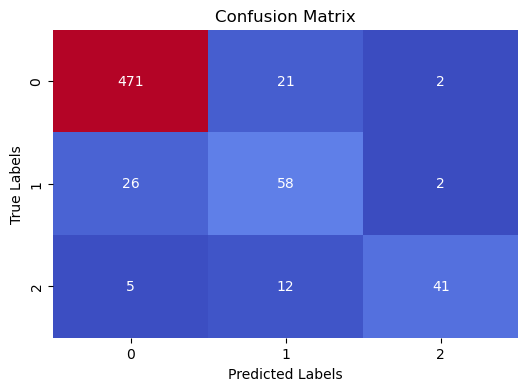

In [91]:
plt.figure(figsize=(6, 4))
sns.heatmap(Conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<span style='font-size:26px;'>**Summary and Evaulation of the three models**</span>


- Decision Tree and KNN Model have identical metrics for each class.
- Random Forest outperforms in Class 1 with high precision, recall, and F1-score.
- Random Forest also exhibits higher overall accuracy (92%) compared to Decision Tree and KNN Model (both at 89%).
- Class 2 performance is similar for Decision Tree and KNN Model, while Random Forest indicates room for improvement.
- All models display generally strong performance across the evaluated metrics.

In summary, while Decision Tree and KNN Model show similar performances, Random Forest stands out with higher accuracy and strong performance in predicting Class 1 instances. Further tuning or exploration may be beneficial, especially for improving predictions in Class 2 across all models.